*Hello , this project for "Artificial Intelligence" subject by : Eng.**Mohamed Alaa Elsayad** , Supervised by Dr. Yasser AlAwady*

*date : monday , 23-12-2024*

# **Mushroom Classification Project**
*is it safe to eat? let's see*

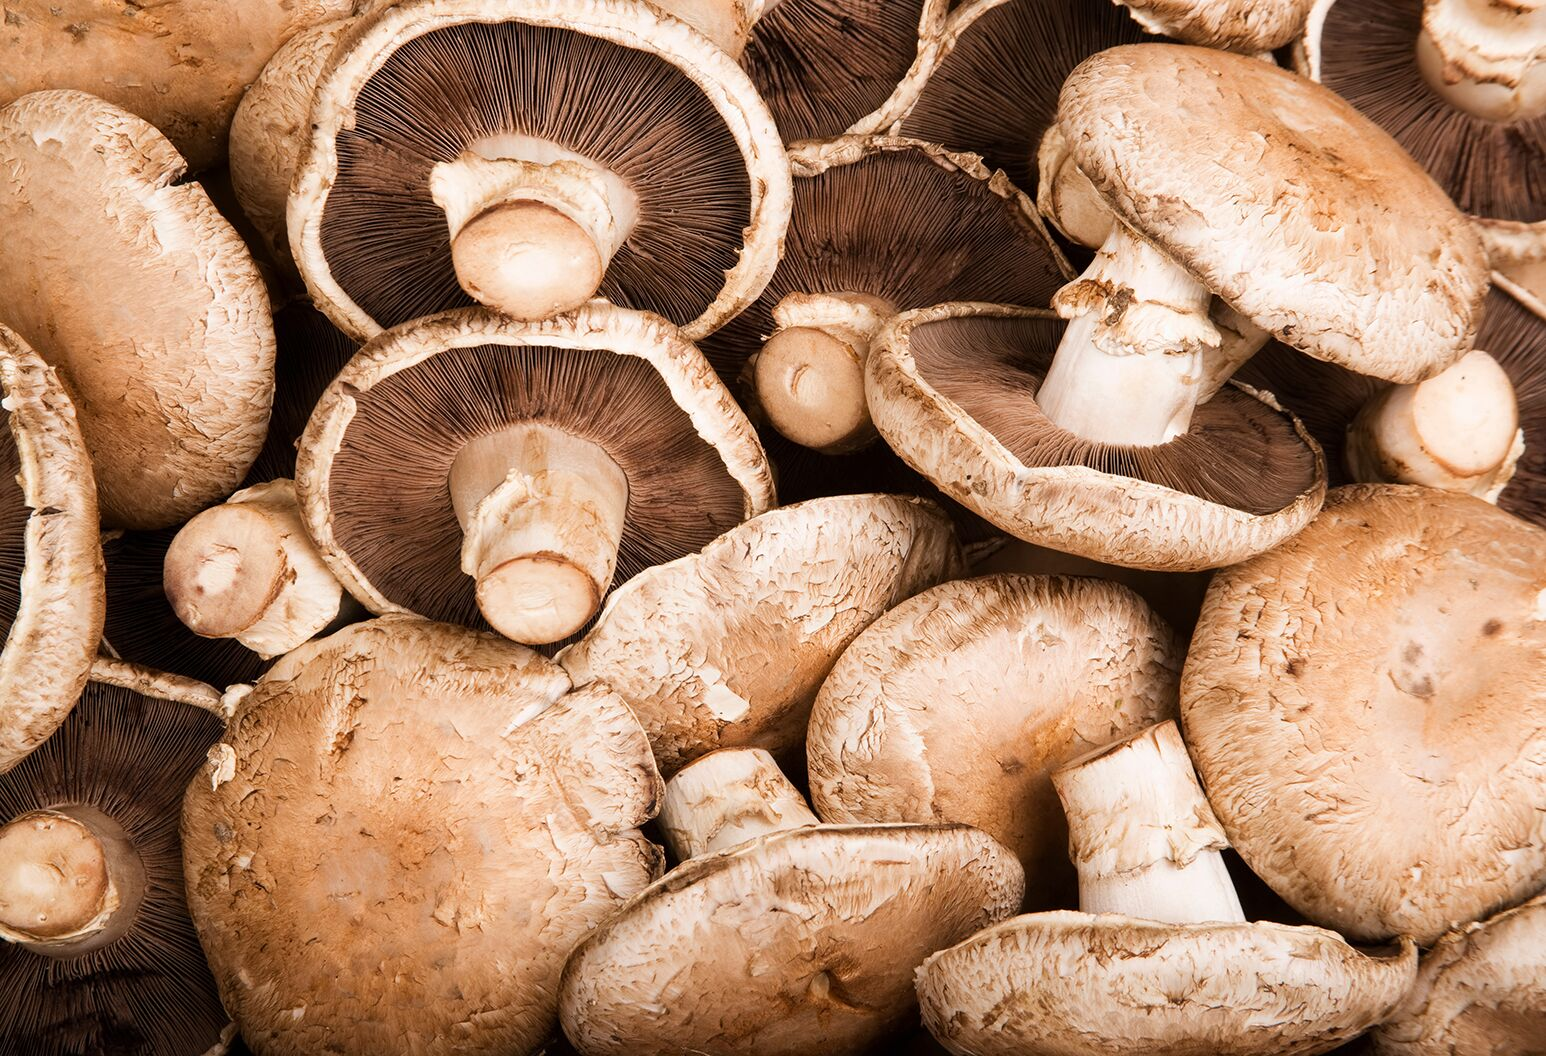

*This project involves building a machine learning model to classify mushrooms as **edible** or **poisonous** based on their characteristics. The dataset contains various features such as cap shape, color, gill attachment, and habitat. The objective is to develop a robust classification model that accurately predicts the edibility of a mushroom.*

**Dataset Link** : [https://www.kaggle.com/datasets/uciml/mushroom-classification](https://)

*let's Start with the steps*

In [1]:
import warnings
warnings.filterwarnings("ignore")

# **Connect To Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **import pandas and load the dataset**

In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/mushrooms.csv")
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


**note that : "p" refers to : "poisonous" , "e" refers to "edible"**

# **Get some info about the Dataset**

In [4]:
df.shape

(8124, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


*check if the dataset is balanced or not:*

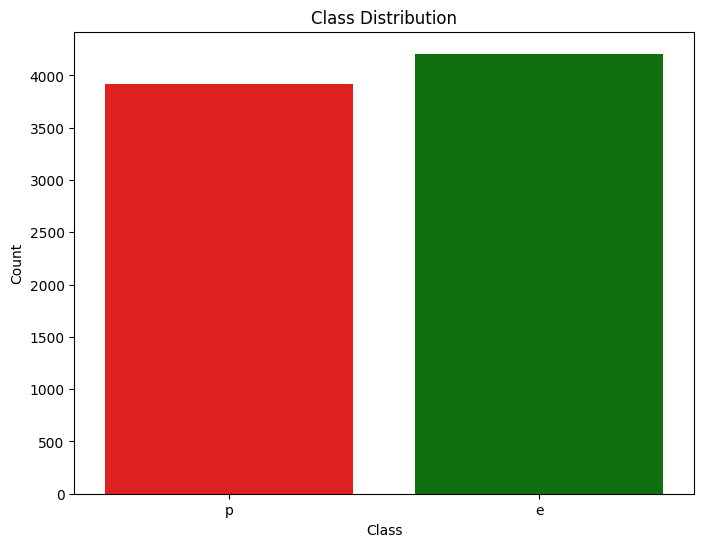

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df, hue='class', palette=['red', 'green'], legend=False)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**as we can see , the dataset is already clean , no duplicated and no nulls , and the data is balanced.**

# **Feature Engieering**

*the column contain alphabet letters , we have to convert them to digits to make  the model can make sense of them*

*so we apply Labelencodeing for all the dataset , Label encoding is a technique used to convert categorical values into numerical labels by assigning each category a unique integer. This method is often used in machine learning models that require numerical input.*

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


# **Split the Dataset**

In [10]:
x = df.drop('class', axis=1)
y = df['class']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
print(f"x_train shape : {x_train.shape}")
print(f"x_test shape : {x_test.shape}")

x_train shape : (6499, 22)
x_test shape : (1625, 22)


# **Build The Model using Grid Search with Logistic Regression**

*Grid search is a technique used to tune hyperparameters by exhaustively trying all possible combinations of a predefined set of values. It helps in finding the best-performing model by evaluating each combination based on cross-validation results.*

In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], #controls the strength of regularization
    'penalty': ['l1', 'l2'], #refers to the type of regularization applied to the model to prevent overfitting
    'solver': ['liblinear', 'saga'] # 'l1' penalty can only be used with 'liblinear' or 'saga' solvers
}

# Create the Logistic Regression model
logistic = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence , max_iter : number of times the model will update the weights


scoring_list = ["accuracy" , "precision" , "recall"]

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logistic, param_grid=param_grid, cv=5, scoring=scoring_list , refit="accuracy")

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_logreg_model = grid_search.best_estimator_
accuracy = best_logreg_model.score(x_test, y_test)
print(f"Test Accuracy of best model: {accuracy}")

Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9670715935334873
Test Accuracy of best model: 0.9667692307692307


# **Evaluate The Model**

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and the predictions from the best model are available
y_pred = best_logreg_model.predict(x_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.9584382871536524
Recall: 0.9731457800511509
F1-score: 0.9657360406091371


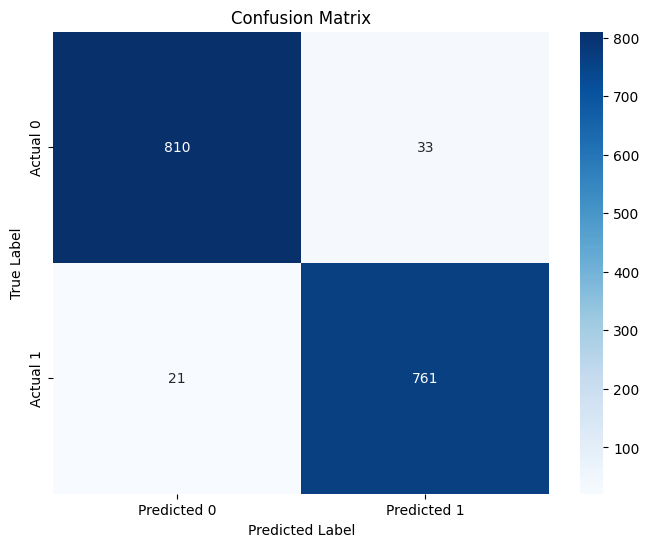

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

*here we can see how we evaluated the Classification model*
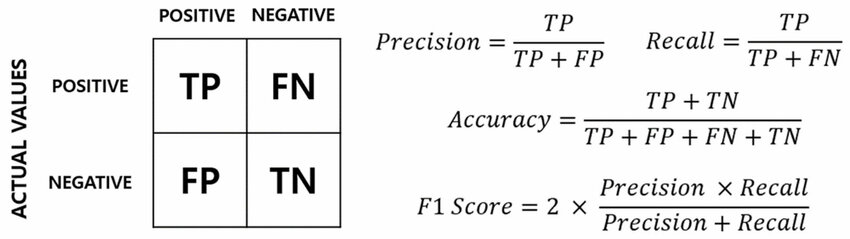

# **Try Decision Tree and Random Forest**

*before implement them , i can swear they will Overfitt on the Dataset , but let's try*

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train, y_train)
dt_predictions = dt_classifier.predict(x_test)

# Evaluate Decision Tree
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)
dt_confusion = confusion_matrix(y_test, dt_predictions)

print("Decision Tree Metrics:")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1-score: {dt_f1}")
print(f"Confusion Matrix:\n{dt_confusion}")


Decision Tree Metrics:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]


In [18]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train, y_train)
rf_predictions = rf_classifier.predict(x_test)

# Evaluate Random Forest
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_confusion = confusion_matrix(y_test, rf_predictions)


print("\nRandom Forest Metrics:")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")
print(f"Confusion Matrix:\n{rf_confusion}")


Random Forest Metrics:
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[843   0]
 [  0 782]]


**As expected , DT and RF model Overfitted on the Dataset**

*what is Overfitting? Overfitting occurs when a model learns not only the underlying patterns in the data but also the noise, making it perform well on training data but poorly on new, unseen data. It happens when the model is too complex relative to the amount of training data.*

# **Thank You..**